In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from diffprivlib.models import LogisticRegression as DPLogisticRegression
from sklearn.tree import DecisionTreeClassifier
from diffprivlib.models import DecisionTreeClassifier as DPTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from diffprivlib.models import RandomForestClassifier as DPRandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv("/Users/sakshiagarwal/Documents/ML/bank-additional-full.csv")

# Feature and target variables
X = data.drop("y", axis=1)
y = data["y"]

In [3]:
# Encode string features
encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == object:
        X[col] = encoder.fit_transform(X[col])

In [4]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [6]:
# Epsilon for DP
epsilon = 1.0
data_norm = np.linalg.norm(X_train, axis=1).max()

In [7]:
# Create DP logistic regression model
dp_model = DPLogisticRegression(epsilon=epsilon, data_norm=data_norm)

In [8]:
# Train normal logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Train DP logistic regression model
dp_model.fit(X_train, y_train)

# Evaluate models on test data
normal_accuracy = model.score(X_test, y_test)
dp_accuracy = dp_model.score(X_test, y_test)

print(f"Normal Logistic Regression Accuracy: {normal_accuracy:.4f}")
print(f"DP Logistic Regression Accuracy: {dp_accuracy:.4f}")

Normal Logistic Regression Accuracy: 0.9035
DP Logistic Regression Accuracy: 0.8900


## Model Evaluation and Comparison

### Normal Logistic Regression vs DP Logistic Regression Accuracy Score

The normal logistic regression model outperforms its differentially private counterpart marginally.

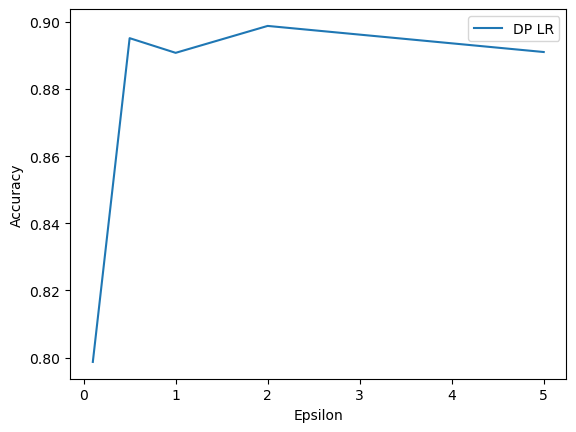

In [9]:
epsilon_values = [0.1, 0.5, 1.0, 2.0, 5.0]
accuracies_normal, accuracies_dp = [], []

for eps in epsilon_values:
    # Create DP logistic regression model
    dp_model = DPLogisticRegression(epsilon=eps, data_norm=data_norm)

    # Train DP logistic regression model
    dp_model.fit(X_train, y_train)

    # Evaluate DP model on test data
    dp_accuracy = dp_model.score(X_test, y_test)
    accuracies_dp.append(dp_accuracy)

# Plot the accuracy vs. epsilon
import matplotlib.pyplot as plt
plt.plot(epsilon_values, accuracies_dp, label="DP LR")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [34]:
# Create normal decision tree model
normal_tree_model = DecisionTreeClassifier()
normal_tree_model.fit(X_train, y_train)

overall_bounds = (X_train.min(), X_train.max())
classes = np.unique(y_train)

# Create DP decision tree model
dp_tree_model = DPTreeClassifier(epsilon=epsilon, bounds=overall_bounds, classes=classes)
dp_tree_model.fit(X_train, y_train)

# Evaluate models on test data
normal_tree_accuracy = normal_tree_model.score(X_test, y_test)
dp_tree_accuracy = dp_tree_model.score(X_test, y_test)

print(f"Normal Decision Tree Accuracy: {normal_tree_accuracy:.4f}")
print(f"DP Decision Tree Accuracy: {dp_tree_accuracy:.4f}")

Normal Decision Tree Accuracy: 0.8861
DP Decision Tree Accuracy: 0.8858


## Model Evaluation and Comparison

### Normal Decision Tree vs DP Decision Tree Accuracy Score

Both normal and differentially private decision trees exhibit similar accuracies, emphasizing robustness to privacy constraints.

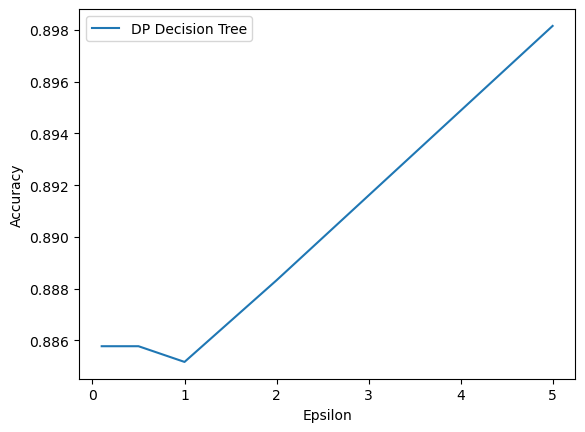

In [38]:
# Evaluate DP decision tree model for different epsilon values
epsilon_values = [0.1, 0.5, 1.0, 2.0, 5.0]
accuracies_tree_normal, accuracies_tree_dp = [], []

for eps in epsilon_values:
    # Create DP decision tree model
    dp_tree_model = DPTreeClassifier(epsilon=eps, bounds=overall_bounds, classes=classes)

    # Train DP decision tree model
    dp_tree_model.fit(X_train, y_train)

    # Evaluate DP model on test data
    dp_tree_accuracy = dp_tree_model.score(X_test, y_test)
    accuracies_tree_dp.append(dp_tree_accuracy)

# Plot the accuracy vs. epsilon for decision trees
plt.plot(epsilon_values, accuracies_tree_dp, label="DP Decision Tree")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

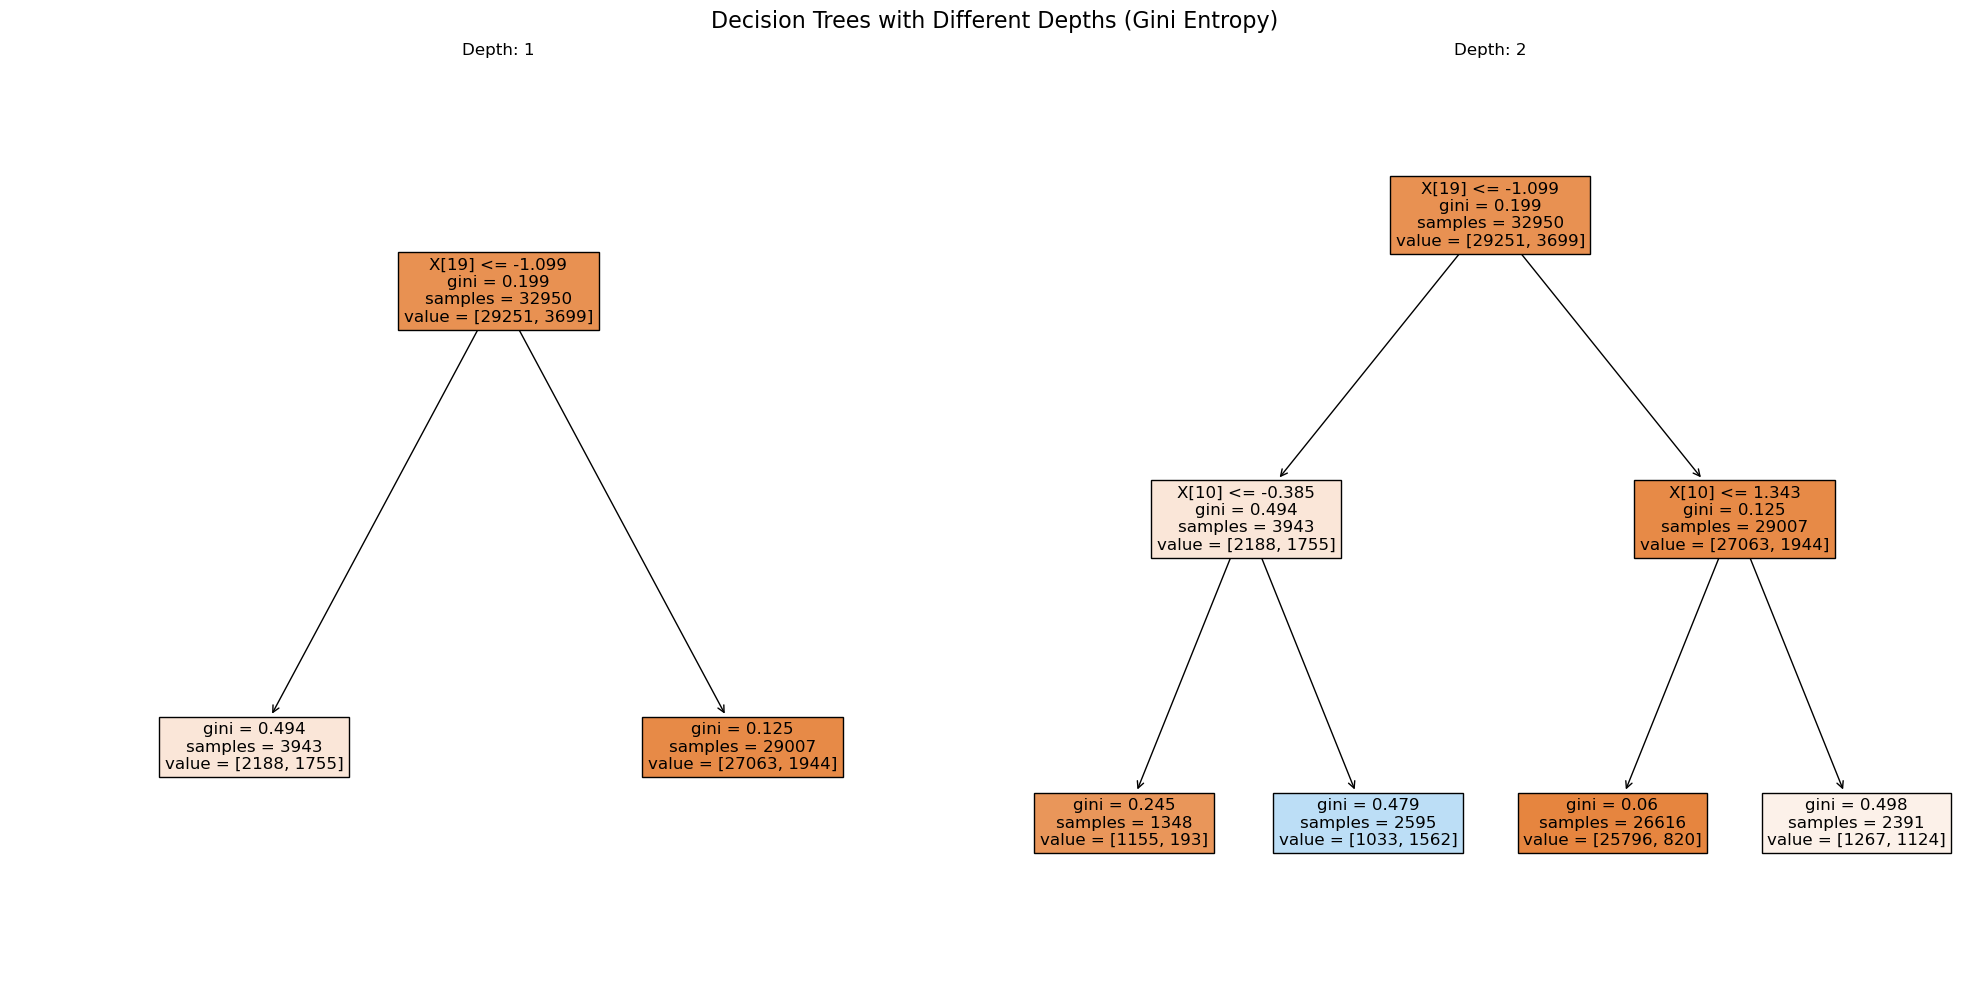

In [39]:
# Create a list of depths
depths = [1, 2]
models = []
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, criterion="gini")
    model.fit(X_train, y_train)
    models.append(model)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
for i, model in enumerate(models):
    ax = axes[i]
    plot_tree(model, ax=ax, filled=True, fontsize=12)
    ax.set_title(f"Depth: {depths[i]}")

fig.suptitle("Decision Trees with Different Depths (Gini Entropy)", fontsize=16)
plt.tight_layout()
plt.show()

In [42]:
# Create normal random forest model
normal_rf_model = RandomForestClassifier()
normal_rf_model.fit(X_train, y_train)

# Specify classes for DP random forest model
classes = np.unique(y_train)
dp_rf_model = DPRandomForestClassifier(n_estimators=10, epsilon=epsilon, bounds=overall_bounds, classes=classes)
dp_rf_model.fit(X_train, y_train)

# Evaluate models on test data
normal_rf_accuracy = normal_rf_model.score(X_test, y_test)
dp_rf_accuracy = dp_rf_model.score(X_test, y_test)

print(f"Normal Random Forest Accuracy: {normal_rf_accuracy:.4f}")
print(f"DP Random Forest Accuracy: {dp_rf_accuracy:.4f}")

/Users/sakshiagarwal/opt/anaconda3/lib/python3.9/site-packages/diffprivlib/models/forest.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  counts = [np.sum(leaf_y == cls) for cls in self.classes]


Normal Random Forest Accuracy: 0.9108
DP Random Forest Accuracy: 0.8853


## Model Evaluation and Comparison

### Normal Random Forest vs DP Random Forest Accuracy Score

The normal random forest model outperforms the differentially private counterpart, suggesting the trade-off between privacy and accuracy.

### Trade-offs:
#### Privacy vs. Accuracy:
Introducing differential privacy incurs a minor accuracy cost, emphasizing the inherent trade-off between privacy protection and model accuracy.
#### Model Complexity:
The impact of privacy preservation on accuracy is more pronounced in complex models (e.g., random forest) compared to simpler ones (e.g., logistic regression).

/Users/sakshiagarwal/opt/anaconda3/lib/python3.9/site-packages/diffprivlib/models/forest.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  counts = [np.sum(leaf_y == cls) for cls in self.classes]
/Users/sakshiagarwal/opt/anaconda3/lib/python3.9/site-packages/diffprivlib/models/forest.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  counts = [np.sum(leaf_y == cls) for cls in self.classes]
/Users/sakshiagarwal/opt/anaconda3/lib/python3.9/site-packages/diffprivlib/models/forest.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  counts = [np.sum(leaf_y == cls) for cls in self.classes]
/Users/sakshiagarwal/opt/anaconda3/lib/python3.9/site-packages/diffprivlib/models/forest.py:580: FutureWarning: elementwise comparison failed; returning s

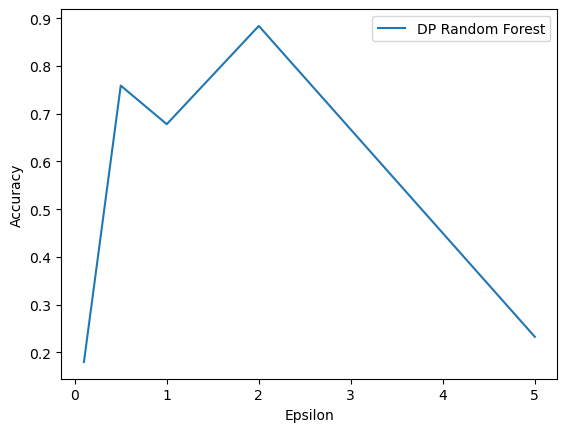

In [45]:
# Evaluate DP random forest model for different epsilon values
epsilon_values = [0.1, 0.5, 1.0, 2.0, 5.0]
accuracies_rftree_normal, accuracies_rftree_dp = [], []

for eps in epsilon_values:
    # Create DP random forest model
    dp_rf_model = DPRandomForestClassifier(n_estimators=10, epsilon=eps, bounds=overall_bounds, classes=classes)

    # Train DP random forest model
    dp_rf_model.fit(X_train, y_train)

    # Evaluate DP model on test data
    dp_tree_accuracy = dp_rf_model.score(X_test, y_test)
    accuracies_rftree_dp.append(dp_tree_accuracy)

# Plot the accuracy vs. epsilon for random forest
plt.plot(epsilon_values, accuracies_rftree_dp, label="DP Random Forest")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Model Evaluation and Comparison

- In the context of differential privacy, epsilon (ε) is a parameter that quantifies the privacy guarantee or the level of privacy protection provided.
- It is used in the differential privacy mechanisms to control the amount of noise or perturbation added to the computations.
- A smaller epsilon value indicates a higher level of privacy but might lead to more noise being added, potentially impacting the accuracy of the model.
- A larger epsilon value allows for less noise but provides a weaker privacy guarantee. 

## Challenges faced and how they were overcome.

### Challenges Faced:
 - Encountered warnings of potential data leakages, revealing vulnerability to unintentional information leaks.
- Main challenge: Adding noise to differentially private models without leaking sensitive information.

### Solutions:
- Implemented data normalization (data_norm) to prevent data leakages.

#### Why Data Normalization:
- Ensures consistent feature scale, preventing any single feature from dominating the model.
- Applied Standard Scaling to mitigate data leakage risks and maintain a uniform scale, enhancing privacy preservation.
- Employed careful parameter tuning and optimization to add noise effectively, ensuring privacy without compromising information.
- Used warnings as a valuable check, underscoring the importance of data handling in privacy-preserving machine learning.

## The real-world applications of the project's findings

The project's findings have direct implications in scenarios where preserving individual privacy is paramount. Industries such as finance, healthcare, and marketing, where sensitive information is involved, can benefit from the implementation of differentially private machine learning models. This approach ensures that valuable insights can be extracted without compromising the privacy of individuals, complying with ethical and legal standards.